In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("god.csv")
g_features = []
g_target = []
count  = 0
for i in range(len(df["diameter"])):
    if df["status"][i] == 1:
        g_target.append(1)
        g_features.append([df["diameter"][i],df["area"][i],df["radius"][i],df["cataract"][i],df["other"][i]])
        count += 1
    elif df["status"][i] == 0 :
        g_target.append(0)
        g_features.append([df["diameter"][i],df["area"][i],df["radius"][i],df["cataract"][i],df["other"][i]])
    elif df["status"][i] == 2 :
        g_target.append(0)
        g_features.append([df["diameter"][i],df["area"][i],df["radius"][i],df["cataract"][i],df["other"][i]])
print(len(g_features))
g_features = np.array(g_features)
g_target = np.array(g_target)

1580


Automatically created module for IPython interactive environment
accuracy_score : 0.7193675889328063
log_loss : 0.549106025221799

accuracy_score : 0.7114624505928854
log_loss : 0.5421414645629924

accuracy_score : 0.758893280632411
log_loss : 0.5278959211976417

accuracy_score : 0.7351778656126482
log_loss : 0.532074082102093

accuracy_score : 0.7222222222222222
log_loss : 0.5460799662651072



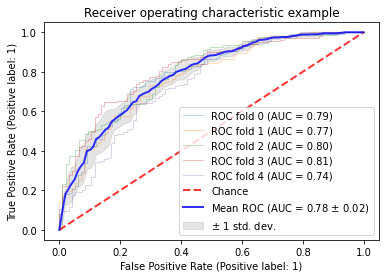

accuracy : 0.7310126582278481
              precision    recall  f1-score   support

           0       0.80      0.37      0.51        99
           1       0.70      0.94      0.80       154

    accuracy                           0.72       253
   macro avg       0.75      0.66      0.66       253
weighted avg       0.74      0.72      0.69       253

              precision    recall  f1-score   support

           0       0.71      0.37      0.49        94
           1       0.71      0.91      0.80       159

    accuracy                           0.71       253
   macro avg       0.71      0.64      0.64       253
weighted avg       0.71      0.71      0.68       253

              precision    recall  f1-score   support

           0       0.81      0.46      0.59        95
           1       0.74      0.94      0.83       158

    accuracy                           0.76       253
   macro avg       0.78      0.70      0.71       253
weighted avg       0.77      0.76      0.74 

In [2]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import StratifiedShuffleSplit

# #############################################################################
# Data IO and generation

# Import some data to play with
X = g_features
y = g_target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape


# Add noisy features
random_state = np.random.RandomState(0)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
# #############################################################################
# Classification and ROC analysis


# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=5,shuffle=True)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
classifier = svm.SVC(probability=True)
history = []
accuracy = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_val)
    history.append(classification_report(y_val,predict))
    clf_probs = classifier.predict_proba(X_val)
    acc = accuracy_score(y_val, predict)
    accuracy.append(acc)
    loss = log_loss(y_val, clf_probs)
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.savefig('Graph/svm_normal_graph.jpg')
plt.show()
predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

for i in range(len(history)):
    print(history[i])

              precision    recall  f1-score   support

           0       0.82      0.34      0.48       117
           1       0.71      0.95      0.82       199

    accuracy                           0.73       316
   macro avg       0.76      0.65      0.65       316
weighted avg       0.75      0.73      0.69       316

0.7278481012658228


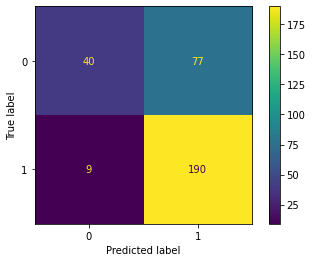

In [3]:
from sklearn.metrics import plot_confusion_matrix

#report
classifier.fit(X_test, y_test)
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

#plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.savefig('Matrix/svm_normal_confusion_matrix.jpg')

Automatically created module for IPython interactive environment
accuracy_score : 0.6719367588932806
log_loss : 2.8791581096793326

accuracy_score : 0.7114624505928854
log_loss : 1.7849547132245898

accuracy_score : 0.7075098814229249
log_loss : 2.5606862804821446

accuracy_score : 0.7075098814229249
log_loss : 1.90916969187708

accuracy_score : 0.7063492063492064
log_loss : 2.0395303113808634



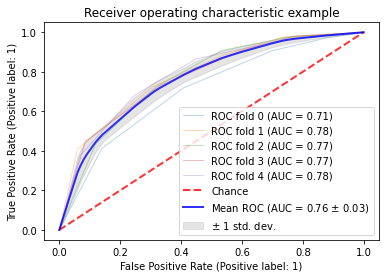

accuracy : 0.75
              precision    recall  f1-score   support

           0       0.55      0.59      0.57        93
           1       0.75      0.72      0.73       160

    accuracy                           0.67       253
   macro avg       0.65      0.66      0.65       253
weighted avg       0.68      0.67      0.67       253

              precision    recall  f1-score   support

           0       0.62      0.69      0.66       101
           1       0.78      0.72      0.75       152

    accuracy                           0.71       253
   macro avg       0.70      0.71      0.70       253
weighted avg       0.72      0.71      0.71       253

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       101
           1       0.77      0.72      0.75       152

    accuracy                           0.71       253
   macro avg       0.70      0.70      0.70       253
weighted avg       0.71      0.71      0.71       253

   

In [4]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
#from sklearn.model_selection import StratifiedShuffleSplit

# #############################################################################
# Data IO and generation

# Import some data to play with
X = g_features
y = g_target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape


# Add noisy features
random_state = np.random.RandomState(0)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
# #############################################################################
# Classification and ROC analysis


# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=5,shuffle=True)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=random_state)
classifier = KNeighborsClassifier(n_neighbors=4)
history = []
accuracy = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_val)
    history.append(classification_report(y_val,predict))
    clf_probs = classifier.predict_proba(X_val)
    acc = accuracy_score(y_val, predict)
    accuracy.append(acc)
    loss = log_loss(y_val, clf_probs)
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.savefig('Graph/knn_normal_graph.jpg')
plt.show()
predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

for i in range(len(history)):
    print(history[i])

              precision    recall  f1-score   support

           0       0.65      0.79      0.71       117
           1       0.86      0.75      0.80       199

    accuracy                           0.76       316
   macro avg       0.75      0.77      0.75       316
weighted avg       0.78      0.76      0.77       316

0.7626582278481012


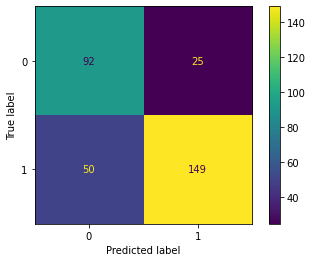

In [5]:
from sklearn.metrics import plot_confusion_matrix

#report
classifier.fit(X_test, y_test)
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

#plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.savefig('Matrix/knn_normal_confusion_matrix.jpg')

Automatically created module for IPython interactive environment
accuracy_score : 0.7944664031620553
log_loss : 0.4525653186313935

accuracy_score : 0.7035573122529645
log_loss : 0.5408342764303544

accuracy_score : 0.766798418972332
log_loss : 0.4764432976555735

accuracy_score : 0.8221343873517787
log_loss : 0.440639231164047

accuracy_score : 0.7579365079365079
log_loss : 0.5287401355467748



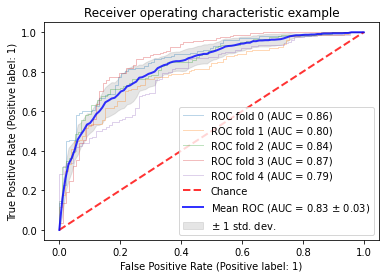

accuracy : 0.7721518987341772
              precision    recall  f1-score   support

           0       0.75      0.66      0.70        93
           1       0.81      0.88      0.84       160

    accuracy                           0.79       253
   macro avg       0.78      0.77      0.77       253
weighted avg       0.79      0.79      0.79       253

              precision    recall  f1-score   support

           0       0.68      0.56      0.61       106
           1       0.72      0.81      0.76       147

    accuracy                           0.70       253
   macro avg       0.70      0.68      0.69       253
weighted avg       0.70      0.70      0.70       253

              precision    recall  f1-score   support

           0       0.72      0.64      0.67        96
           1       0.79      0.85      0.82       157

    accuracy                           0.77       253
   macro avg       0.75      0.74      0.75       253
weighted avg       0.76      0.77      0.76 

In [6]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
#from sklearn.model_selection import StratifiedShuffleSplit

# #############################################################################
# Data IO and generation

# Import some data to play with
X = g_features
y = g_target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape


# Add noisy features
random_state = np.random.RandomState(0)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
# #############################################################################
# Classification and ROC analysis


# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=5,shuffle=True)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=random_state)
classifier = LogisticRegression(random_state=random_state)
history = []
accuracy = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_val)
    history.append(classification_report(y_val,predict))
    clf_probs = classifier.predict_proba(X_val)
    acc = accuracy_score(y_val, predict)
    accuracy.append(acc)
    loss = log_loss(y_val, clf_probs)
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.savefig('Graph/lg_normal_graph.jpg')
plt.show()
predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

for i in range(len(history)):
    print(history[i])

              precision    recall  f1-score   support

           0       0.73      0.62      0.67       117
           1       0.79      0.86      0.83       199

    accuracy                           0.77       316
   macro avg       0.76      0.74      0.75       316
weighted avg       0.77      0.77      0.77       316

0.7721518987341772


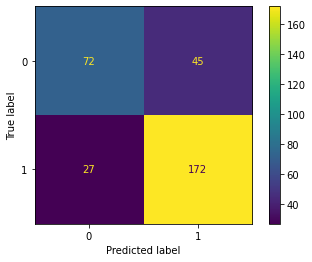

In [7]:
from sklearn.metrics import plot_confusion_matrix

#report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

#plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.savefig('Matrix/lg_normal_confusion_matrix.jpg')

Automatically created module for IPython interactive environment
accuracy_score : 0.6996047430830039
log_loss : 0.9330941003496838

accuracy_score : 0.7272727272727273
log_loss : 0.7730712825388949

accuracy_score : 0.7707509881422925
log_loss : 0.5605617454030197

accuracy_score : 0.7549407114624506
log_loss : 0.7105438740463227

accuracy_score : 0.7222222222222222
log_loss : 1.0251061780961552



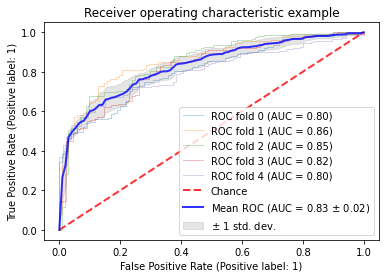

accuracy : 0.740506329113924
              precision    recall  f1-score   support

           0       0.70      0.44      0.54       101
           1       0.70      0.88      0.78       152

    accuracy                           0.70       253
   macro avg       0.70      0.66      0.66       253
weighted avg       0.70      0.70      0.68       253

              precision    recall  f1-score   support

           0       0.75      0.48      0.59       102
           1       0.72      0.89      0.80       151

    accuracy                           0.73       253
   macro avg       0.74      0.69      0.69       253
weighted avg       0.73      0.73      0.71       253

              precision    recall  f1-score   support

           0       0.79      0.57      0.67       101
           1       0.76      0.90      0.83       152

    accuracy                           0.77       253
   macro avg       0.78      0.74      0.75       253
weighted avg       0.77      0.77      0.76  

In [8]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import StratifiedShuffleSplit

# #############################################################################
# Data IO and generation

# Import some data to play with
X = g_features
y = g_target

n_samples, n_features = X.shape


# Add noisy features
random_state = np.random.RandomState(0)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
# #############################################################################
# Classification and ROC analysis


# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=5,shuffle=True)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
classifier = GaussianNB()
history = []
accuracy = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_val)
    history.append(classification_report(y_val,predict))
    clf_probs = classifier.predict_proba(X_val)
    acc = accuracy_score(y_val, predict)
    accuracy.append(acc)
    loss = log_loss(y_val, clf_probs)
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.savefig('Graph/nb_normal_graph.jpg')
plt.show()
predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

for i in range(len(history)):
    print(history[i])

              precision    recall  f1-score   support

           0       0.69      0.55      0.61       117
           1       0.76      0.85      0.81       199

    accuracy                           0.74       316
   macro avg       0.73      0.70      0.71       316
weighted avg       0.73      0.74      0.73       316

0.740506329113924


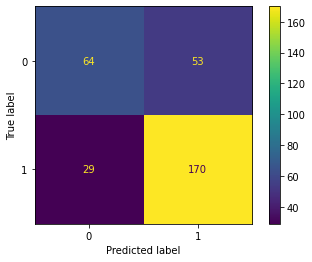

In [9]:
from sklearn.metrics import plot_confusion_matrix

#report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

#plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.savefig('Matrix/nb_normal_confusion_matrix.jpg')